https://ekamperi.github.io/machine%20learning/2021/01/21/encoder-decoder-model.html#a-more-interesting-dataset
This is a good link to create a basic framework once the data is set

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler

In [61]:
# Load database
pdf = pd.read_excel(r'Test.xlsx')

# Select only the necessary 
metric_names = ['S1', 'S2','S3','S4','S5','S6','S7','S8','S9','S10']
npdf = pdf[metric_names]

# Convert pandas dataframe to numpy array
x_train = npdf.to_numpy()

# Scale data to have zero mean and unit variance
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_train

array([[17., 14., 66., 50., 54., 23., 32., 12., 22., 46.],
       [51., 99., 36., 62., 56., 63., 38., 82., 19., 53.],
       [66., 90., 86., 13., 89., 48., 22., 77., 40., 80.],
       [70., 16., 13., 68., 56., 25., 64., 91., 96., 79.],
       [48., 44., 18., 72., 15., 21., 12., 72., 64., 32.],
       [68., 25., 40., 45., 27., 63., 36., 67., 53., 85.],
       [36., 49., 22., 74., 97., 38., 74., 73., 71., 34.],
       [10., 54., 73., 52., 22., 94., 51., 78., 32., 92.],
       [74., 98., 48., 37., 90., 23., 41., 28., 61., 66.],
       [40., 67., 42., 75., 81., 25., 62., 15., 35., 79.]])

Building the autoencoder

In [56]:
# This is the dimension of the original space
input_dim = 10

# This is the dimension of the latent space (encoding space)
latent_dim = 3

encoder = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(latent_dim, activation='relu')
])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim,)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(input_dim, activation=None)
])

In [57]:
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer='adam')

<ipython-input-58-88409e9c79e0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.axes[i].set_xticklabels(metric_names)
<ipython-input-58-88409e9c79e0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.axes[i].set_xticklabels(metric_names)
<ipython-input-58-88409e9c79e0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.axes[i].set_xticklabels(metric_names)


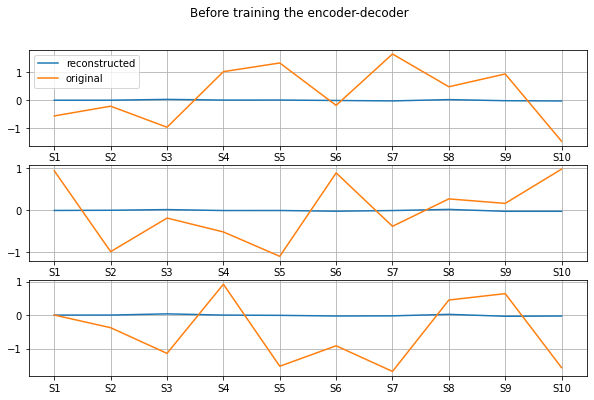

In [58]:
def plot_orig_vs_recon(title='', n_samples=3):
    fig = plt.figure(figsize=(10,6))
    plt.suptitle(title)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        idx = random.sample(range(x_train.shape[0]), 1)
        plt.plot(autoencoder.predict(x_train[idx]).squeeze(), label='reconstructed' if i == 0 else '')
        plt.plot(x_train[idx].squeeze(), label='original' if i == 0 else '')
        fig.axes[i].set_xticklabels(metric_names)
        plt.xticks(np.arange(0, 10, 1))
        plt.grid(True)
        if i == 0: plt.legend();

plot_orig_vs_recon('Before training the encoder-decoder')

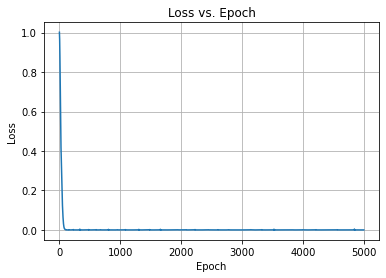

In [59]:
model_history = autoencoder.fit(x_train, x_train, epochs=5000, batch_size=32, verbose=0)

plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

<ipython-input-58-88409e9c79e0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.axes[i].set_xticklabels(metric_names)
<ipython-input-58-88409e9c79e0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.axes[i].set_xticklabels(metric_names)
<ipython-input-58-88409e9c79e0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.axes[i].set_xticklabels(metric_names)


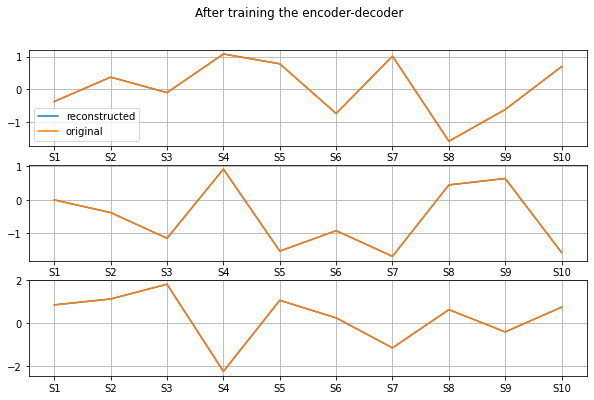

In [60]:
plot_orig_vs_recon('After training the encoder-decoder')